In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from gensim.models import KeyedVectors, Word2Vec, FastText
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from konlpy.tag import Okt, Mecab

from utils import weat_score, read_token, read_token_mecab

#### 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [25]:
with open('/home/masang/Desktop/Quest03/synopsis/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [26]:
# okt = Okt()
# tokenized = []
# with open('/home/masang/Desktop/Quest03/synopsis/synopsis.txt', 'r') as file:
#     while True:
#         line = file.readline()
#         if not line: 
#             break
#         words = okt.pos(line, stem=True, norm=True)
#         res = []
#         for w in words:
#             if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
#                 res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
#         tokenized.append(res)

In [27]:
mecab = Mecab()
tokenized = []
with open('/home/masang/Desktop/Quest03/synopsis/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: 
            break
        words = mecab.pos(line)
        res = []
        for word, pos in words:
            if pos in ["NNG", "NNP", "NNB", "NNBC"]:
                res.append(word)    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

In [29]:
print(len(tokenized))

71156


#### 2. 추출된 결과로 embedding model 만들기

In [30]:
# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
# model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, workers=4, sg=1)
model = FastText(tokenized, vector_size=100, window=5, min_count=3, workers=4, sg=1)

In [31]:
model.wv.most_similar(positive=['영화'])

[('영화판', 0.7953415513038635),
 ('극영화', 0.7760167717933655),
 ('영화인', 0.7714769840240479),
 ('영화계', 0.7575989365577698),
 ('모큐멘터리', 0.7461249232292175),
 ('영화사', 0.7452414035797119),
 ('영화광', 0.735770046710968),
 ('서사', 0.7305002808570862),
 ('옴니버스', 0.7293605804443359),
 ('픽션', 0.7292193174362183)]

In [32]:
model.wv.most_similar(positive=['시작'])

[('계속', 0.6883305311203003),
 ('막장', 0.6249973177909851),
 ('무언', 0.6138263940811157),
 ('파란만장', 0.6084105968475342),
 ('처절', 0.5978132486343384),
 ('까지', 0.5970373153686523),
 ('스릴', 0.5949901938438416),
 ('태경', 0.5936750173568726),
 ('발단', 0.5916532278060913),
 ('돌입', 0.5892362594604492)]

In [33]:
model.wv.most_similar(positive=['자신'])

[('본인', 0.7720018625259399),
 ('스스', 0.7439094185829163),
 ('트린', 0.7295328974723816),
 ('동질감', 0.7236770391464233),
 ('성심', 0.7225612998008728),
 ('자신감', 0.7216038107872009),
 ('세르죠', 0.7155070304870605),
 ('회한', 0.7105277180671692),
 ('회개', 0.7104713916778564),
 ('족쇄', 0.7097650170326233)]

#### 3. TF-IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기

In [34]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

art = read_token_mecab(art_txt)
gen = read_token_mecab(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [35]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 43392)


In [36]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[25352])

25352
영화


In [37]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
자신, 시작, 사랑, 사람, 친구, 영화, 남자, 여자, 가족, 이야기, 마을, 마음, 사건, 시간, 세상, 아버지, 아이, 엄마, 세계, 아들, 소녀, 아내, 사이, 영화제, 감독, 서로, 남편, 비밀, 여행, 인생, 학교, 발견, 순간, 사실, 음악, 생활, 아빠, 마지막, 행복, 기억, 모습, 죽음, 소년, 이상, 도시, 단편, 사고, 결혼, 때문, 위기, 생각, 관계, 한편, 성공, 전쟁, 일상, 경찰, 최고, 과거, 인간, 현실, 미국, 상황, 결심, 운명, 여인, 하루, 이름, 이후, 준비, 위험, 동안, 감정, 충격, 살인, 부모, 한국, 존재, 연인, 어머니, 희망, 특별, 결국, 청년, 국제, 시절, 동생, 작가, 작품, 여성, 상처, 모두, 사회, 목숨, 할머니, 진실, 매력, 계획, 일본, 프랑스, 

일반영화를 대표하는 단어들:
자신, 영화제, 사람, 시작, 영화, 친구, 국제, 남자, 사랑, 이야기, 여자, 서울, 사건, 남편, 가족, 아이, 아버지, 시간, 세계, 단편, 마을, 엄마, 마음, 아들, 모습, 관계, 감독, 생각, 작품, 사이, 세상, 발견, 아내, 여성, 소녀, 사실, 애니메이션, 때문, 이상, 인간, 생활, 죽음, 결혼, 비밀, 상황, 학교, 기억, 도시, 여행, 소년, 순간, 서로, 한편, 과거, 경찰, 동안, 미국, 마지막, 현실, 전쟁, 존재, 일상, 주인공, 사회, 사고, 어머니, 연출, 인생, 섹스, 다큐멘터리, 부문, 한국, 살인, 위험, 행복, 최고, 의도, 위기, 동생, 조직, 부부, 회사, 계획, 이후, 일본, 시절, 성공, 아빠, 결국, 문제, 부산, 하루, 음악, 부모, 운명, 감정, 경쟁, 사진, 결심, 할머니, 

In [38]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): 
        target_art.append(w1_[i])
    if len(target_art) == n: 
        break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): 
        target_gen.append(w2_[i])
    if len(target_gen) == n: 
        break

In [39]:
print(target_art)
print(target_gen)

['여인', '이름', '준비', '충격', '연인', '희망', '특별', '청년', '작가', '상처', '모두', '목숨', '진실', '매력', '프랑스']
['서울', '애니메이션', '주인공', '연출', '섹스', '다큐멘터리', '부문', '의도', '조직', '부부', '회사', '문제', '부산', '경쟁', '사진']


In [40]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', 'family', 'show', 'horror', 'etc', 'documentary', 'drama', 'romance', 'musical', 'mystery', 'crime', 'historical', 'western',
         'adult', 'thriller', 'animation', 'action', 'adventure', 'war', 'comedy', 'fantasy']

print(len(genre_txt))

21


In [41]:
genre = []
for file_name in genre_txt:
    genre.append(read_token_mecab(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [42]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 44677)


In [43]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
    
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 20):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 자신, 지구, 시작, 사람, 인류, 인간, 세계, 우주, 미래, 로봇, 박사, 친구, 거대, 외계, 우주선, 시간, 생명체, 존재, 세상, 발견, 
family: 엄마, 아빠, 영화제, 가족, 자신, 친구, 아버지, 시작, 아들, 사랑, 마을, 국제, 아이, 낙타, 할머니, 사람, 씨제이, 학교, 동구, 세상, 
show: 사랑, 오페라, 비올레타, 실황, 스카르피, 토스카, 백작, 자신, 카바, 레오노라, 공연, 알프레도, 오텔로, 리골레토, 베르디, 왕자, 콘서트, 만리, 타미, 비바, 
horror: 친구, 시작, 사람, 자신, 공포, 사건, 발견, 죽음, 남자, 이상, 마을, 영화, 여자, 가족, 악령, 아이, 소녀, 사실, 비밀, 병원, 
etc: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 남자, 여자, 친구, 사랑, 시작, 페스티벌, 미디어, 엄마, 작품, 독립, 연출, 시간, 
documentary: 영화제, 영화, 다큐, 다큐멘터리, 국제, 사람, 이야기, 감독, 자신, 서울, 세계, 여성, 시작, 가족, 한국, 환경, 작품, 아이, 사회, 모습, 
drama: 자신, 영화제, 사랑, 영화, 사람, 시작, 남자, 친구, 국제, 여자, 이야기, 엄마, 단편, 가족, 아버지, 서울, 아이, 마음, 아들, 남편, 
romance: 사랑, 남자, 자신, 친구, 여자, 시작, 남편, 사람, 섹스, 마음, 결혼, 아내, 관계, 부부, 영화, 엄마, 서로, 시간, 아버지, 사이, 
musical: 뮤지컬, 사랑, 지모도, 에스메랄다, 영화, 프롤, 스카르피, 음악, 충무로, 모차르트, 카바, 자신, 영화제, 토스카, 시작, 시앙치, 데이비, 팬텀, 최고, 바흐, 
mystery: 사건, 시작, 자신, 사람, 친구, 사고, 발견, 진실, 죽음, 기억, 남자, 아내, 살인, 민혁, 아이, 여자, 영화, 형사, 비밀, 사실, 
crime: 사건, 자신, 경찰, 시작, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 수사, 여자, 발견, 

#### 4. embedding model과 단어 셋으로 WEAT score 구해보기

In [44]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [45]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

<AxesSubplot:>

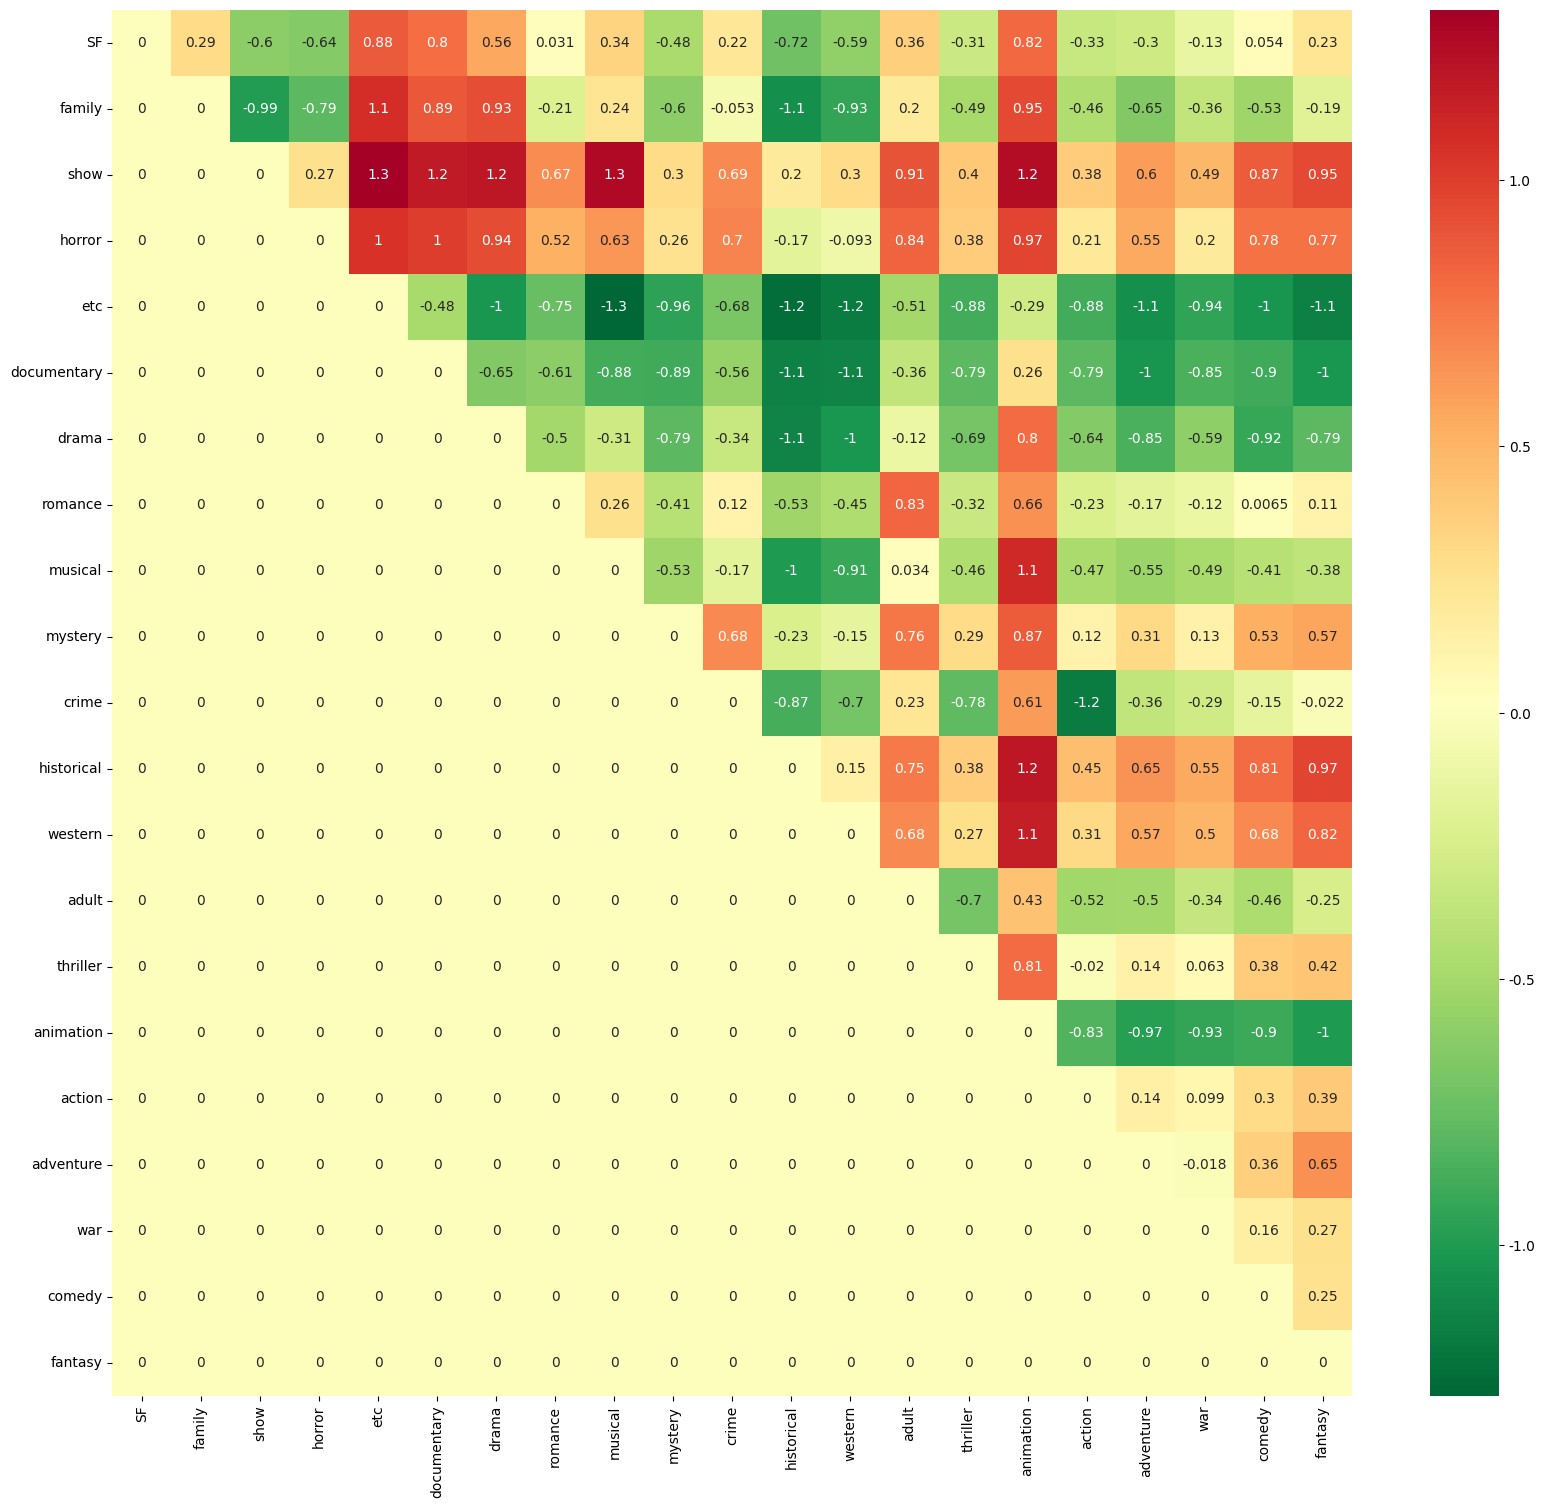

In [46]:
np.random.seed(0)

# 마이너스 부호 
plt.rcParams['axes.unicode_minus'] = False

# 그래프 크기 조절
plt.figure(figsize=(20, 18))
ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

### 결과 & 회고

##### 단어 임베딩 결과

1) Word2Vec  
![Image](https://github.com/user-attachments/assets/b2f75bcd-5e11-4a7b-84d0-65fb23336dcf)  
![Image](https://github.com/user-attachments/assets/2b0c3832-eda9-4529-be4d-c1d1ae726d27)  
![Image](https://github.com/user-attachments/assets/84c43428-d7f7-417e-b7bc-39d0c3b2bfe9)  

2) FastText  
![Image](https://github.com/user-attachments/assets/bccb947a-2238-41b9-9fd4-1c974f9165b4)  
![Image](https://github.com/user-attachments/assets/aa2e906f-6921-4dc4-901f-8a9d46dabe64)  
![Image](https://github.com/user-attachments/assets/49a40bae-bb07-448d-b8cb-65c397a0b594)

Subword 방식으로 단어 임베딩을 하는 FastText가 한국어 임베딩에 더 적합한 모델로 알려져 있다. 하지만 '영화'라는 단어와 가까운 관계에 있는 단어들을 나열했을 때, 영화 장르만 열거하는 FastText보단 Word2Vec이 영화와 관련있다고 생각되는 단어를 열거하는 것을 보면 FastText가 Word2Vec보다 무조건 합리적인 선택지라고 볼 순 없을지도 모르겠다.<br>  
다만 더 세부적인 토큰화를 하는 Kkma나 Mecab과 결합해서 쓴다면 FastText의 성능이 좋아질 수 있지 않을까? 라고 추측해볼 수 있기 때문에 이 부분은 토큰화 방식을 바꿔서 다시 실험해봐도 좋을 것이다.

3) Word2Vec with Mecab  
![Image](https://github.com/user-attachments/assets/6fe932c1-24e0-4a62-b51f-0b2e7fee5512)  
![Image](https://github.com/user-attachments/assets/d98044c2-1c65-48b5-8cd5-690e591a3b87)  
![Image](https://github.com/user-attachments/assets/5fd4df15-582a-4aa5-9418-97a3cf4a1579)  

4) FastText with Mecab  
![Image](https://github.com/user-attachments/assets/1d967d03-863a-4080-a922-82540a475e1d)  
![Image](https://github.com/user-attachments/assets/b0fcc8f9-d739-423e-bd46-514590f8f1b8)  
![Image](https://github.com/user-attachments/assets/020a01a9-9db1-477f-9415-6f812708a8de)

Okt보다 더 세부적인 품사 태깅을 바탕으로 정확한 형태소 분석을 하는 Mecab을 사용하니 query 단어와 관련도 높은 단어가 가까운 단어로 나열되는 것을 확인하였다. 특히 '영화'라는 단어를 FastText로 학습할 때의 경우, Okt로 토큰화했을 때보다 훨씬 신뢰도 높은 관련 단어들이 출력되었다.

##### WEAT score
1) Word2Vec
![Image](https://github.com/user-attachments/assets/e880489b-62d4-461a-a6a2-02989ebf4e05)  

2) FastText
![Image](https://github.com/user-attachments/assets/2c1a0749-7165-4cac-b08a-cf0cbab9fc5d)  

두 단어 임베딩 방식의 WEAT score의 전체적인 양상 자체에는 큰 차이점을 발견하진 못했다. 다만, FastText가 Word2Vec보다 WEAT score의 절댓값이 좀 더 큰 것으로 보아(한눈에 봐도 heatmap 색깔이 FastText 쪽이 좀 더 진하다.) 단어 표현의 편향성을 부각시키려는 경향이 FastText가 더 크다고 볼 수 있다.

3) Word2Vec with Mecab
![Image](https://github.com/user-attachments/assets/0a9efd4d-a31b-4a60-8c9d-100cb39c82fa)  

4) FastText with Mecab
![Image](https://github.com/user-attachments/assets/4883c58c-1aa2-4947-b1b4-cf33c01fd2e4)

반면 Mecab으로 토큰화한 텍스트에 대하여 편향성 분석을 했을 때는 Word2Vec과 FastText 간 heatmap의 절댓값 차가 이전만큼 두드러지진 않았다. 실제로 앞서 단어 간 관계를 코사인 유사도를 바탕으로 나타낸 것을 돌이켜보면, Okt로 토큰화한 후 임베딩한 결과는 두 임베딩 결과에 많은 차이가 나타난 반면 Mecab으로 토큰화했을 때는 그 차이가 줄어든 것을 확인할 수 있었고 이것이 WEAT score에도 그대로 반영된 것으로 보인다.

TF-IDF의 대안?  
- TextRank : 그래프 기반으로 단어 간 관계를 활용하여 핵심 키워드를 추출  
- keyBERT : BERT 임베딩을 활용해 문서에서 중요한 단어를 추출. 키워드와 문서 내용 간의 의미적 유사도를 고려함

TextRank, keyBERT로 키워드 추출을 했을 때 어떤 결과가 나오는지도 실험해볼 계획이다.